## Plotting Software to display comparisons between ray-tracing results and predictions of various geolocation and refractive index determination techniques.

## The software requires that you have a folder identified as "ray_data" on your desktop and that the output "data.csv" file is stored into this folder. 

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/ray/Desktop/ray_data/data.csv


In [4]:
#df.info()

In [5]:
df.tail(-500)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_gs_2p,gran_gs,2nd_elv_init,lgc_rt,height,phase,scat_mode,resid_gran,h_2p,th_2p,lgc_2p,nr_2p,lat_2p,lon_2p,bearing,bx,by,bz,B,b_kx,b_kz,dip,hv_sm,th_sm,lgc_sm,lgc_diff_2p,lgc_diff_sm,nr_diff_2p,elv_init_select
500,5,22.3,655000,10000,57.204903,-104.192970,0.917494,6596899.0,sas,11.586668,0.091695,2012-09-20 18:00:00,9.053802,1548.195766,1738587.500,18.572808,584.187394,225.8990,2,0.5,-1083587.500,276.225805,0.091294,581.637114,0.917887,57.188735,-104.034260,17.038292,9288.682397,1392.274413,48652.932964,49551.245541,0.187461,0.981871,79.191021,179.625,0.097542,621.438964,2.550280,-37.251570,-0.000392,NaN
501,5,22.3,665000,10000,57.280148,-104.155754,0.914990,6598500.5,sas,10.903183,0.093053,2012-09-20 18:00:00,9.056283,1548.195766,1738587.500,18.572808,592.839132,227.5005,2,0.5,-1073587.500,280.853968,0.092628,590.130335,0.917114,57.261757,-103.992876,17.073087,9251.224568,1380.883834,48670.837826,49561.501701,0.186616,0.982029,79.240341,191.375,0.098535,627.766718,2.708798,-34.927585,-0.002124,NaN
502,5,22.3,675000,10000,57.355343,-104.118492,0.912662,6601089.5,sas,10.227086,0.094410,2012-09-20 18:00:00,9.058767,1548.195766,1738587.500,18.572808,601.487548,230.0895,2,0.5,-1063587.500,285.493935,0.093959,598.611729,0.916343,57.334664,-103.951385,17.108001,9213.849508,1369.489871,48688.546825,49571.616044,0.185772,0.982186,79.289517,203.125,0.099506,633.950962,2.875819,-32.463414,-0.003681,NaN
503,5,22.3,685000,10000,57.430489,-104.081161,0.910512,6604336.0,sas,9.558236,0.095767,2012-09-20 18:00:00,9.061256,1548.195766,1738587.500,18.572808,610.132831,233.3360,2,0.5,-1053587.500,290.145683,0.095288,607.081293,0.915572,57.407455,-103.909788,17.143034,9176.557792,1358.092724,48706.060816,49581.589214,0.184931,0.982342,79.338550,214.875,0.100455,639.996277,3.051538,-29.863446,-0.005060,NaN
504,5,22.2,655000,10000,57.209179,-104.190849,0.918496,6596271.5,sas,11.648088,0.091776,2012-09-20 18:00:00,9.053943,1549.188676,1738157.375,18.468020,584.702893,225.2715,2,0.5,-1083157.375,275.211627,0.091374,582.142797,0.918627,57.193083,-104.031800,17.040359,9286.451328,1391.596765,48654.003809,49551.859768,0.187411,0.981880,79.193960,179.625,0.097542,621.438964,2.560096,-36.736071,-0.000131,NaN
505,5,22.2,665000,10000,57.284500,-104.153595,0.915975,6597784.0,sas,10.970291,0.093135,2012-09-20 18:00:00,9.056427,1549.188676,1738157.375,18.468020,593.363080,226.7840,2,0.5,-1073157.375,279.825021,0.092708,590.644696,0.917856,57.266179,-103.990364,17.075200,9248.957049,1380.193384,48671.916666,49562.118722,0.186564,0.982039,79.243326,191.375,0.098535,627.766718,2.718385,-34.403638,-0.001882,NaN
506,5,22.2,675000,10000,57.359760,-104.116287,0.913627,6600288.0,sas,10.291136,0.094494,2012-09-20 18:00:00,9.058914,1549.188676,1738157.375,18.468020,602.019898,229.2880,2,0.5,-1063157.375,284.450243,0.094041,599.134793,0.917086,57.339159,-103.948821,17.110160,9211.545535,1368.786557,48689.633384,49572.235645,0.185720,0.982196,79.292548,203.125,0.099506,633.950962,2.885105,-31.931064,-0.003458,NaN
507,5,22.2,685000,10000,57.434967,-104.078926,0.911458,6603502.5,sas,9.619248,0.095852,2012-09-20 18:00:00,9.061405,1549.188676,1738157.375,18.468020,610.673583,232.5025,2,0.5,-1053157.375,289.087267,0.095372,607.613083,0.916316,57.412025,-103.907171,17.145239,9174.217365,1357.376483,48707.154815,49582.211178,0.184878,0.982351,79.341626,214.875,0.100455,639.996277,3.060500,-29.322694,-0.004858,NaN
508,5,22.1,655000,10000,57.213287,-104.188820,0.919484,6595683.5,sas,11.724148,0.091856,2012-09-20 18:00:00,9.054079,1550.779319,1738437.625,18.362737,585.216113,224.6835,2,0.5,-1083437.625,274.196571,0.091453,582.646936,0.919366,57.197417,-104.029348,17.042420,9284.227176,1390.921117,48655.070781,49552.471669,0.187361,0.981890,79.196889,179.625,0.097542,621.438964,2.569177,-36.222851,0.000118,NaN
509,5,22.1,665000,10000,57.288677,-104.151527,0.916945,6597089.5,sas,11.040335,0.093217,2012-09-20 18:00:00,9.

In [6]:
df['lgc_diff_2p'].describe()

count    2876.000000
mean        0.561713
std         6.303861
min       -18.549938
25%        -2.449190
50%         2.173731
75%         4.335007
max        12.590889
Name: lgc_diff_2p, dtype: float64

In [7]:
df['lgc_diff_sm'].describe()

count    2876.000000
mean      -49.477123
std        88.373366
min      -303.961623
25%      -133.191917
50%       -13.223966
75%        26.210566
max        63.217399
Name: lgc_diff_sm, dtype: float64

In [8]:
#df['lgc_diff_cm'].describe()

In [9]:
df['nr_diff_2p'].describe()

count    2876.000000
mean       -0.001110
std         0.004053
min        -0.012670
25%        -0.003258
50%        -0.001194
75%         0.001294
max         0.015624
Name: nr_diff_2p, dtype: float64

In [10]:
df['h_2p'].describe()

count    2876.000000
mean      275.140948
std        95.717814
min        89.521475
25%       209.817219
50%       275.590207
75%       329.171614
max       463.671592
Name: h_2p, dtype: float64

In [11]:
bins = np.arange(-202.5, 202.5,5)

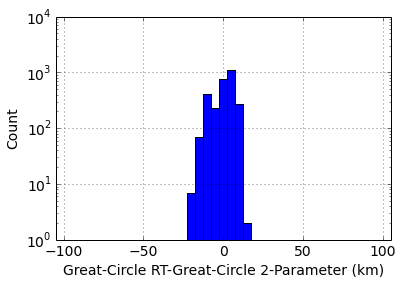

In [12]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-105, 105)
plt.ylim(1,10000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

In [13]:
#df['lgc_diff_sm'].hist(bins=bins, log=True)
#plt.xlim(-205, 205)
#plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
#plt.ylabel('Count')

In [14]:
#df['lgc_diff_cm'].hist(bins=bins, log=True)
#plt.xlim(-205, 205)
#plt.ylim(1, 1000)
#plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
#plt.ylabel('Count')

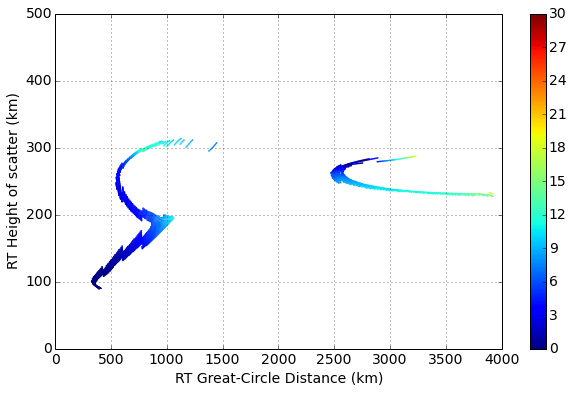

In [15]:
df[xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=30) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

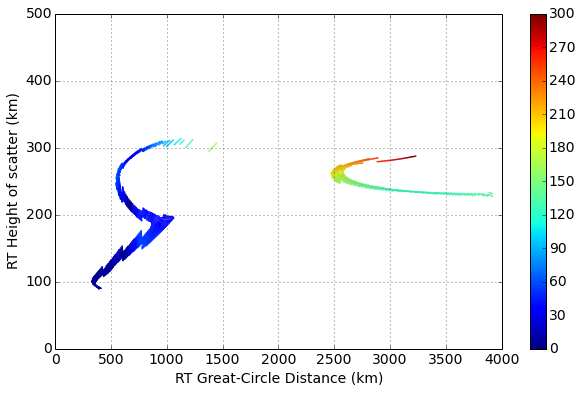

In [16]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Standard Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_sm'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=300) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

In [17]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Chisham Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

#xvar = df['lgc_rt']
#yvar = df['height']
#color = np.abs(df['lgc_diff_cm'])
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
#scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
#plt.colorbar(scat)
#ax.set_xlabel ('RT Great-Circle Distance (km)')
#ax.set_xlim(0, 2500)
#ax.set_ylim(0, 500)
#ax.set_ylabel ('RT Height of scatter (km)')
#ax.grid()

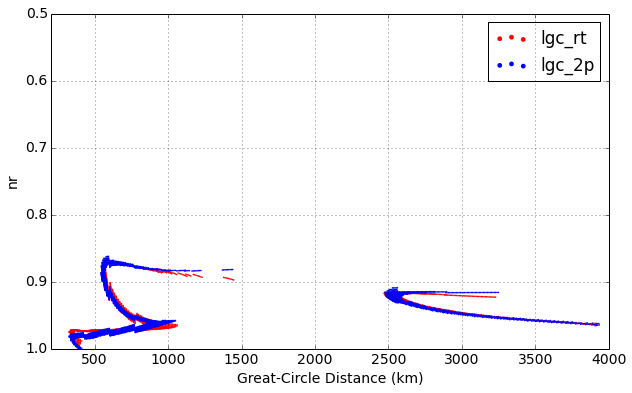

In [18]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', label='lgc_rt')
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 4000)
ax.set_ylim(1, 0.5)
ax.set_ylabel ('nr')
ax.grid()
ax.legend(loc='upper right', markerscale=3)

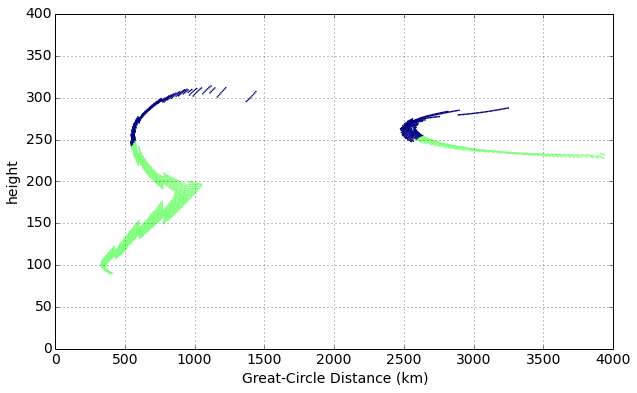

In [19]:
xvar = df['lgc_2p']
yvar = df['height']
color = df['phase']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c= color, s=10, marker='.', edgecolor='none', vmin=1, vmax=3)
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0, 400)
ax.set_ylabel ('height')
ax.grid()
#Blue dots represent Phase 1 rays: penetrating rays that have have one scatter region.
#green dots represent Phase 2 rays: reflected rays that can backscatter in the bottomside
            #E-layer and F-layer before being reflected by the ionosphere. These are
            #the only rays capable of 1 1/2 hop backscatter.

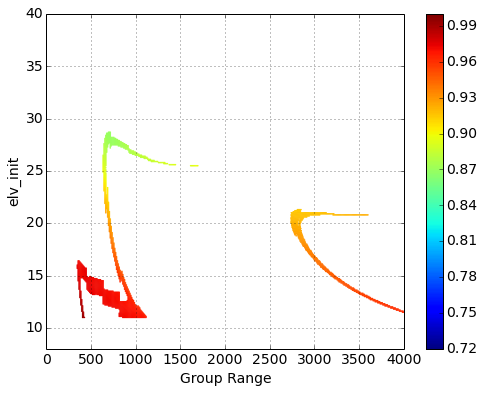

In [20]:
xvar = df['gran']/1000.
yvar = df['elv_init']
color = df['nr']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.72, vmax=1.0) 
plt.colorbar(scat)
ax.set_xlabel ('Group Range')
ax.set_xlim(0, 4000)
ax.set_ylim(8, 40)
ax.set_ylabel ('elv_init')
ax.grid()

In [21]:
df['lgc_diff_2p'].describe()

count    2876.000000
mean        0.561713
std         6.303861
min       -18.549938
25%        -2.449190
50%         2.173731
75%         4.335007
max        12.590889
Name: lgc_diff_2p, dtype: float64

In [22]:
df['nr_diff_2p'].describe()

count    2876.000000
mean       -0.001110
std         0.004053
min        -0.012670
25%        -0.003258
50%        -0.001194
75%         0.001294
max         0.015624
Name: nr_diff_2p, dtype: float64

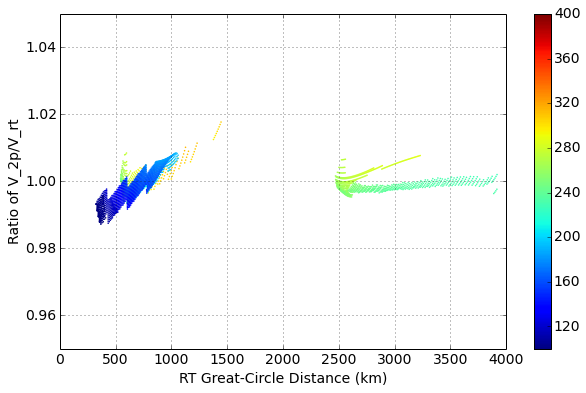

In [23]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [24]:
bins_nr = np.arange(-.025, .025, .001)

In [25]:
bins_nr

array([ -2.50000000e-02,  -2.40000000e-02,  -2.30000000e-02,
        -2.20000000e-02,  -2.10000000e-02,  -2.00000000e-02,
        -1.90000000e-02,  -1.80000000e-02,  -1.70000000e-02,
        -1.60000000e-02,  -1.50000000e-02,  -1.40000000e-02,
        -1.30000000e-02,  -1.20000000e-02,  -1.10000000e-02,
        -1.00000000e-02,  -9.00000000e-03,  -8.00000000e-03,
        -7.00000000e-03,  -6.00000000e-03,  -5.00000000e-03,
        -4.00000000e-03,  -3.00000000e-03,  -2.00000000e-03,
        -1.00000000e-03,   2.08166817e-17,   1.00000000e-03,
         2.00000000e-03,   3.00000000e-03,   4.00000000e-03,
         5.00000000e-03,   6.00000000e-03,   7.00000000e-03,
         8.00000000e-03,   9.00000000e-03,   1.00000000e-02,
         1.10000000e-02,   1.20000000e-02,   1.30000000e-02,
         1.40000000e-02,   1.50000000e-02,   1.60000000e-02,
         1.70000000e-02,   1.80000000e-02,   1.90000000e-02,
         2.00000000e-02,   2.10000000e-02,   2.20000000e-02,
         2.30000000e-02,

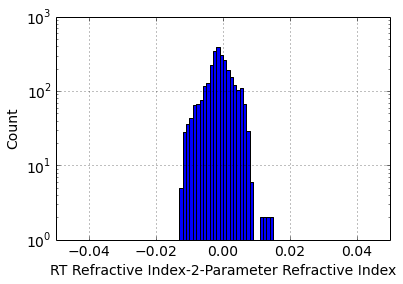

In [26]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.05, .05)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

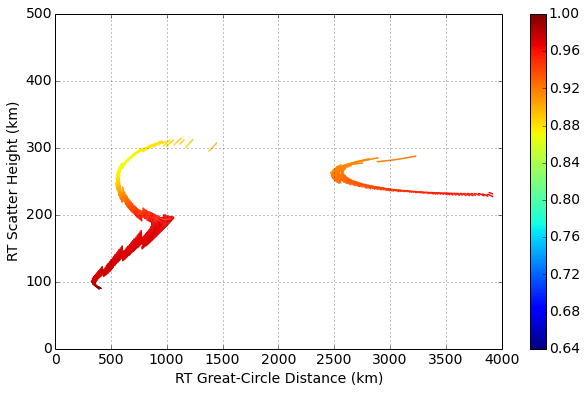

In [27]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
rcParams.update({'font.size':14})
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.64, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

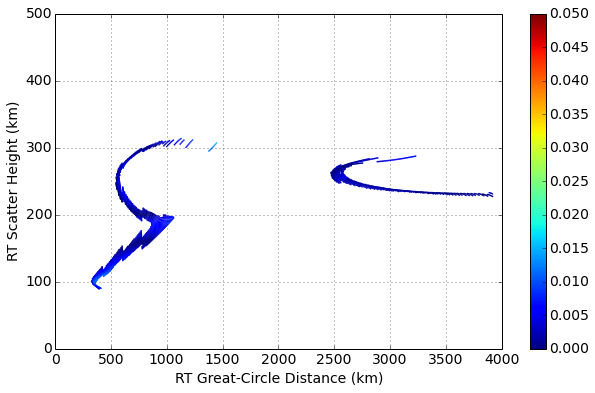

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0, vmax=0.05)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 4000)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

In [29]:
see=['elv_init', 'scat_mode', 'lgc_rt', 'lgc_2p', 'nr', 'nr_2p']

In [30]:
df[see].tail(-1000)

,elv_init,scat_mode,lgc_rt,lgc_2p,nr,nr_2p
1000,19.0,1.5,2593.113234,2600.329652,0.926453,0.930359
1001,19.0,1.5,2602.018165,2609.031757,0.926384,0.930336
1002,19.0,1.5,2610.923856,2617.723500,0.926353,0.930313
1003,18.9,0.5,653.501649,650.453520,0.935958,0.937334
1004,18.9,0.5,662.378146,659.165292,0.933749,0.936609
1005,18.9,0.5,671.251132,667.866055,0.931667,0.935884
1006,18.9,1.5,2544.478261,2553.258864,0.928090,0.931165
1007,18.9,1.5,2553.386420,2562.031896,0.927751,0.931139
1008,18.9,1.5,2571.201978,2579.547206,0.927216,0.931090
1009,18.9,1.5,2580.109567,2588.289455,0.927018,0.931065


In [32]:
tf = df['scat_mode'] == 1.5
df['nr_diff_2p'][tf].describe()

count    819.000000
mean      -0.000675
std        0.002256
min       -0.004319
25%       -0.002298
50%       -0.001175
75%        0.000306
max        0.007075
Name: nr_diff_2p, dtype: float64

In [33]:
tf = df['scat_mode'] == 0.5
df['nr_diff_2p'][tf].describe()

count    2057.000000
mean       -0.001283
std         0.004565
min        -0.012670
25%        -0.004290
50%        -0.001229
75%         0.001896
max         0.015624
Name: nr_diff_2p, dtype: float64

In [34]:
tf = df['scat_mode'] == 1.5
df['lgc_diff_2p'][tf].describe()

count    819.000000
mean      -7.843575
std        4.154419
min      -18.549938
25%      -10.817114
50%       -8.516474
75%       -5.167731
max        2.843065
Name: lgc_diff_2p, dtype: float64

In [35]:
tf = df['scat_mode'] == 0.5
df['lgc_diff_2p'][tf].describe()

count    2057.000000
mean        3.908301
std         3.058408
min         0.067249
25%         1.451624
50%         3.278056
75%         5.515211
max        12.590889
Name: lgc_diff_2p, dtype: float64

In [ ]:
#df['lgc_diff_gs'] = df['lgc_gs'] - df['']